# MLS-Project-2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lin

In [2]:
# Read Dataset into Dataframe
power_dataset = pd.read_csv("Resources/power_dataset.csv")

power_dataset

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


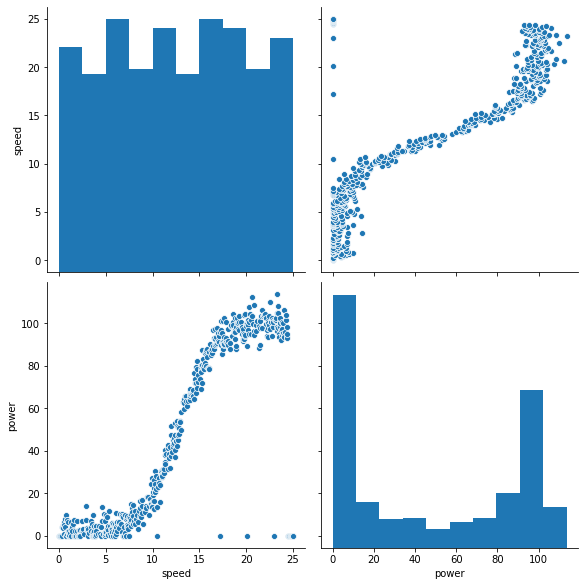

In [3]:
# Pairplot used to get basic overview of relationship between wind speed and power
sns.pairplot(power_dataset, height=4)

## Pairplot

The pairplot above of the power_dataset shows a couple of different things.

- The plot of speed by speed shows that we have a pretty much uniform distribution of wind speed accross 0-25 units of assuming mph.
- The plot of power by power indicates that for a great deal of time 0 power was produced even though there was a pretty much uniform spread of speed accross the dataset with another peak aroun the 100 power unit. This leads me to believe that for a great amount of time that even though power could have been produced the windmill was not producing power possibly for maintenance reasons.
- Finally when we look at the plot of speed and power we can see what looks like a linear relationship between wind speed and power because as the wind speed increases so to does the power production.
- Also from the plot of speed and power we can assume the earlier suggestion was correct in that even though the wind speeds were higher that 10 0 power was produced, comparing this to other rows where power was produced and quite a lot in comparison we can assume that the windmill was down for whatever reason.
- It appears that power production starts to increase above a wind speed of 10, also for the training of our model we can safetly not include the lines where wind speed is greater than or equal to 10 so as to get a more accurate model.

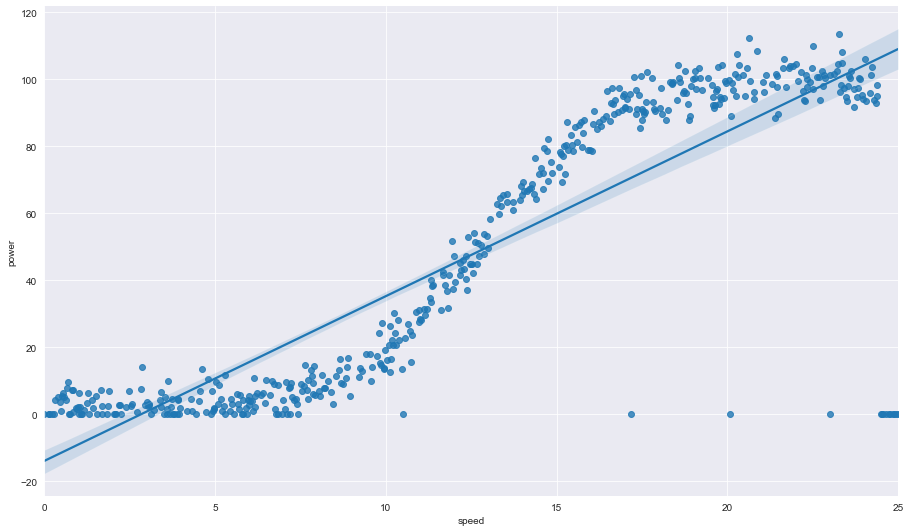

In [4]:
sns.set_style("darkgrid")

sns.lmplot(x="speed", y="power", data=power_dataset, height=7.5, aspect=1.7, fit_reg=True);

## Models

### Linear Model
Code for below adapted from Topic 3 Lectures.

In [5]:
def linear_model(x, p):
    return p[0] + x * p[1]

In [6]:
x = power_dataset["speed"].to_numpy()
y = power_dataset["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [7]:
r

0.7289360258564073

In [8]:
p

[-13.899902630519634, 4.9175956654046695]

### Linear Model Prediction

In [9]:
def linear_predict(x):
    return linear_model(x, p)

In [10]:
linear_predict(23.0)

99.20479767378777